# Developing a neural network that can read handwritten

In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

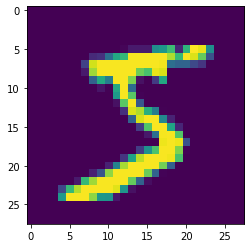

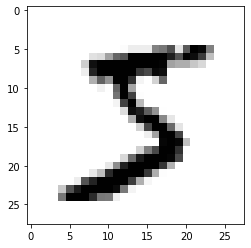

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
#in order to check the images 
# if it is not in binary we can change it
plt.imshow(X_train[0],cmap="binary")

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

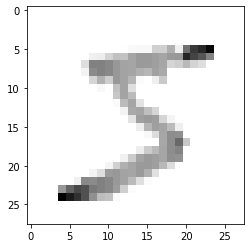

In [7]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
plt.imshow(X_train[0],cmap="binary")

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE=28
X_trainr=np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
# incresing the one dimension for kernel operation
X_testr=np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print('training sample dimension', X_trainr.shape)
print('testing sample dimension', X_testr.shape)

training sample dimension (60000, 28, 28, 1)
testing sample dimension (10000, 28, 28, 1)


In [11]:
from keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Activation,Flatten,Conv2D,MaxPool2D

In [12]:
model = Sequential()
#first convolution layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=X_trainr.shape[1:]))
model.add(MaxPool2D((2,2)))
#maxpooling
#second convolution layer
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation="relu"))
model.add(MaxPool2D((2,2)))
#third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=X_trainr.shape[1:]))
model.add(MaxPool2D((2,2)))
#fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))#before using fully flattened layer need to be flattened
#convert 2D to 1D
#neural network layer
#fully connected layer2
model.add(Dense(32))
model.add(Activation("relu"))
#last layer (0-9)
model.add(Dense(10))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [15]:
model.fit(X_trainr,y_train, epochs=5,  validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 51s 36ms/step - loss: 0.3255 - accuracy: 0.8995 - val_loss: 0.1455 - val_accuracy: 0.9553
Epoch 2/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.1078 - accuracy: 0.9665 - val_loss: 0.1012 - val_accuracy: 0.9672
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.0821 - val_accuracy: 0.9763
Epoch 4/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 5/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0674 - val_accuracy: 0.9791


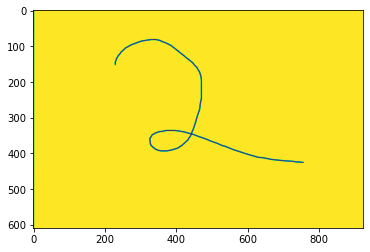

In [16]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('C:\\Users\\DELL\\Desktop\\LetsGrowMore\\Image.png',0)
plt.imshow(img)

In [17]:
img.shape

(609, 924)

In [18]:
import cv2
import tensorflow as tf
import numpy as np
resize=cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
resize.shape
newimg=tf.keras.utils.normalize(resize,axis=1)#0 to one scaling
IMG_SIZE=28
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #kernqal operation convolution layer
newimg.shape

(1, 28, 28, 1)

In [19]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 176ms/step


In [20]:
print(np.argmax(predictions))

0
